In [1]:
from sklearn.cluster import AffinityPropagation
import matplotlib.pyplot as plt
from itertools import cycle

import matplotlib.pyplot as plt
import sklearn.metrics as sm
import time
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
data = pd.read_csv('bcw_data.csv', header=None)

In [3]:
def convertToVals(X):
    myArray = []
    for x in X:
        if x == 4:
            myArray.append(1)
        elif x == 2:
            myArray.append(0)
    return myArray

In [4]:
df = pd.DataFrame(data.values)

In [5]:
df.drop(df[df[6]=='?'].index, inplace=True)

In [6]:
target = np.array(convertToVals(df.iloc[:,10:].values))

In [7]:
X = pd.DataFrame(df.iloc[:,1:10].values)

In [8]:
X.columns = ['Clump Thickness','Uniformity_Of_Cell_Size','Uniformity_Of_Cell_Shape','Marginal Adhesion','Single Epithelial Cell Size',
            'Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']

In [9]:
y = pd.DataFrame(target)
y.columns = ['Targets']

In [10]:
# Setup Affinity Propagation
start_time = time.time()
#AffinityPropagation(damping=0.5, max_iter=200, convergence_iter=15, copy=True, preference=None, , verbose=False)[source]
af = AffinityPropagation(convergence_iter=4, preference=-990, verbose=True).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
print("--- %s seconds ---" % (time.time() - start_time))

Converged after 87 iterations.
--- 2.5952374935150146 seconds ---


In [11]:
no_clusters = len(cluster_centers_indices)

In [12]:
no_clusters

5

In [13]:
cluster_centers_indices

array([ 22, 178, 221, 352, 452], dtype=int64)

In [14]:
xx = X.values

Estimated number of clusters: 5


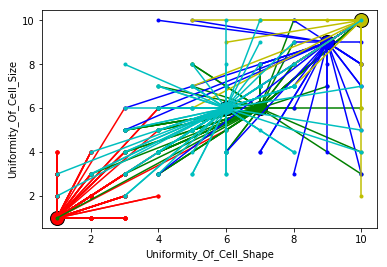

In [15]:
print('Estimated number of clusters: %d' % no_clusters)
# Plot exemplars

plt.close('all')
plt.figure(1)
plt.clf()
colors = cycle('rgbycmyk')
for k, col in zip(range(no_clusters), colors):
    class_members = labels == k
    cluster_center = xx[cluster_centers_indices[k]]
    plt.plot(xx[class_members, 1], xx[class_members, 2], col + '.')
    plt.plot(cluster_center[1], cluster_center[2], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
    for x in xx[class_members]:
        plt.plot([cluster_center[1], x[1]], [cluster_center[2], x[2]], col)
plt.xlabel('Uniformity_Of_Cell_Shape')
plt.ylabel('Uniformity_Of_Cell_Size')
plt.show()

In [16]:
sm.accuracy_score(target, af.labels_)

0.7218155197657394

In [17]:
sm.confusion_matrix(target, af.labels_)

array([[435,   3,   1,   0,   5],
       [ 16,  58,  50,  37,  78],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0]], dtype=int64)